# DBSCAN
Density-Based Spatial Clustering of Applications with Noise

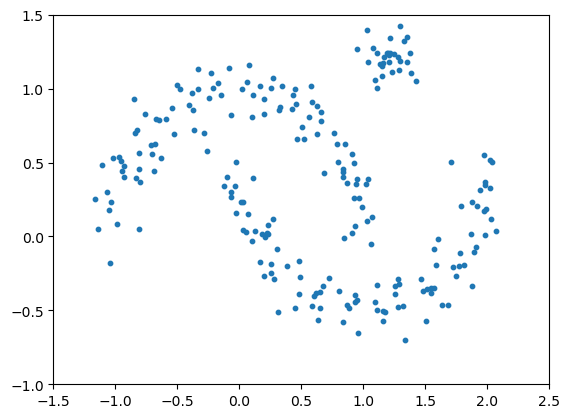

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

x1, y1 = datasets.make_moons(n_samples=200, noise=0.1, random_state=0)
x2, y2 = datasets.make_blobs(n_samples=30, n_features=2, centers=[[1.2,1.2]],
                            cluster_std=[[0.1]], random_state=0)

X = np.concatenate((x1, x2), axis=0)
plt.scatter(X[:,0], X[:,1], s=10)
plt.axis([-1.5,2.5,-1,1.5])
plt.show()

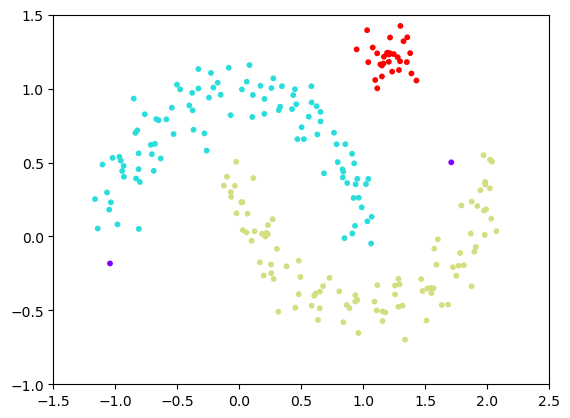

In [124]:
class DBSCAN():
    def __init__(self, X, eps, MinPts):
        self.eps = eps
        self.MinPts = MinPts
        self.Omega = []  # 初始化核心对象
        self.k = 0  # 初始化聚类簇数
        self.X = X
        self.m, self.d = X.shape
        self.Gamma = [i for i in range(self.m)]  # 初始化未访问样本集合
        self.distM = np.zeros((self.m, self.m))  # 距离矩阵 穷举
        self.neighborN = np.zeros((self.m, self.m))  # 记录样本i邻域内样本数
        self.class_flag = np.zeros(self.m)  # 簇标记
        self.Omega_init()
        
    def Omega_init(self):
        for i in range(self.m):
            num_pts = 0  # 样本i邻域内样本数
            for j in range(self.m):
                self.distM[i,j] = (self.X[i,:] - self.X[j,:]) @ (self.X[i,:] - self.X[j,:])  # 内积
                if i != j and self.distM[i,j] <= self.eps:
                    num_pts += 1
                    self.neighborN[i,j] = 1
            if num_pts >= self.MinPts:
                self.Omega.append(i)  # 将样本i加入核心对象集合Omega

    def clustering(self):
        while self.Omega:
            Gamma_old = self.Gamma[:]  # 记录当前未访问样本集合
            o = np.random.choice(self.Omega)  # 随机选取一个核心对象
            Queue = [o]  # 初始化队列
            self.Gamma.remove(o)
            while Queue:
                q = Queue.pop(0)  # 取出队列Q中的首个样本q
                Delta = []
                if q in self.Omega:  # q是核心对象
                    for i in range(self.m):
                        if self.neighborN[q,i] == 1:
                            Delta.append(i)
                    Delta = list(set(Delta).intersection(self.Gamma))  # 交集
                    Queue += Delta
                    for d in Delta:
                        self.Gamma.remove(d)
                        
            self.k += 1
            for gamma in self.Gamma:
                Gamma_old.remove(gamma)
            Ck = Gamma_old
            self.class_flag[Ck] = self.k
            for c in Ck:
                if c in self.Omega:
                    self.Omega.remove(c)
        
        plt.scatter(self.X[:,0],self.X[:,1], c=self.class_flag, s=10, cmap='rainbow')
        plt.axis([-1.5,2.5,-1,1.5])
        plt.show()

np.random.seed(0)
a = DBSCAN(X, 0.05, 3)
a.clustering()